<a href="https://colab.research.google.com/github/carlgran/SIIM_ISIC_Competition/blob/master/test_NN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth

auth.authenticate_user()



In [2]:
!curl https://sdk.cloud.google.com | bash


Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/kms/keys/create.py
google-cloud-sdk/lib/surface/kms/keys/describe.py
google-cloud-sdk/lib/surface/kms/keys/get_iam_policy.py
google-cloud-sdk/lib/surface/kms/keys/get_iam_policy.yaml
google-cloud-sdk/lib/surface/kms/keys/list.py
google-cloud-sdk/lib/surface/kms/keys/remove_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/kms/keys/remove_rotation_schedule.py
google-cloud-sdk/lib/surface/kms/keys/set_iam_policy.py
google-cloud-sdk/lib/surface/kms/keys/set_iam_policy.yaml
google-cloud-sdk/lib/surface/kms/keys/set_primary_version.py
google-cloud-sdk/lib/surface/kms/keys/set_rotation_schedule.py
google-cloud-sdk/lib/surface/kms/keys/update.py
google-cloud-sdk/lib/surface/kms/keys/versions/__init__.py
google-cloud-sdk/lib/surface/kms/keys/versions/create.py
google-cloud-sdk/lib/surface/kms/keys/versions/describe.py
google-cloud-sdk/lib/surface/kms/keys/versions/destroy.py
google-cloud-sdk/lib/surface/kms/keys

In [3]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: cggranadosj@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] cggranadosj@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [cggranadosj@gmail.com].

Pick cloud project to use: 
 [1] third-h

In [4]:
11


11

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image, display
import os
from os.path import join
from sklearn.model_selection import train_test_split
import random,time


In [6]:
import tensorflow as tf

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.126.19.106:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.126.19.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.126.19.106:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [7]:
 device_name = tf.test.gpu_device_name()
 if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
 print('Found GPU at: {}'.format(device_name))

In [8]:
# from kaggle_datasets import KaggleDatasets
# !ls /kaggle/input/
# GCS_PATH = KaggleDatasets().get_gcs_path('siim-isic-melanoma-classification') # you can list the bucket with "!gsutil ls $GCS_PATH"
# !gsutil ls $GCS_PATH

# **Using .tf files and TPU**

In [34]:
# numpy and matplotlib defaults
np.set_printoptions(threshold=15, linewidth=80)
CLASSES = [0,1]

def batch_to_numpy_images_and_labels(data):
    images, labels, target = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    #if numpy_labels.dtype == object: # binary string in this case, these are image ID strings
    #    numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = label
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

In [35]:
def replacenan(img_features):
    img_feat = []
    for feat in img_features:
        #new_feat = tf.clip_by_value(feat, -1e12, 1e12)
        new_feat = tf.where(tf.math.is_nan(feat), tf.zeros_like(feat), feat)
        img_feat.append(new_feat)
    return img_feat


In [36]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'sex': tf.io.FixedLenFeature([], tf.int64),
        'age_approx': tf.io.FixedLenFeature([], tf.float32),
        'anatom_site_general_challenge': tf.io.FixedLenFeature([], tf.float32),
        "target": tf.io.FixedLenFeature([], tf.int64),
        'N_contours': tf.io.FixedLenFeature([], tf.int64), 
        'total_perimeter': tf.io.FixedLenFeature([], tf.float32), 
        'max_area': tf.io.FixedLenFeature([], tf.float32), 
        'total_area': tf.io.FixedLenFeature([], tf.float32),
        'max_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'mean_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'in_gray_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_gray': tf.io.FixedLenFeature([], tf.float32),
        'in_red_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_red': tf.io.FixedLenFeature([], tf.float32), 
        'in_green_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_green': tf.io.FixedLenFeature([], tf.float32), 
        'in_blue_mean': tf.io.FixedLenFeature([], tf.float32),
        'out_blue': tf.io.FixedLenFeature([], tf.float32), 
        'mean_red_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_green_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_blue_ratio': tf.io.FixedLenFeature([], tf.float32),
        'freq': tf.io.FixedLenFeature([], tf.float32)
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = example['image_name']
    age_approx = example['age_approx']
    anatom_site_general_challenge = example['anatom_site_general_challenge']
#     anatom_site_general_challenge = tf.dtypes.cast(example['anatom_site_general_challenge']
# , tf.int64)
    target = example['target']
    N_contours = example['N_contours']
    total_perimeter = example['total_perimeter']
    max_area = example['max_area']
    total_area = example['total_area']
    max_complexity = example['max_complexity']
    mean_complexity = example['mean_complexity']
    in_gray_mean = example['in_gray_mean'] 
    out_gray = example['out_gray']
    in_red_mean = example['in_red_mean']
    out_red = example['out_red'] 
    in_green_mean = example['in_green_mean']
    out_green = example['out_green'] 
    in_blue_mean = example['in_blue_mean']
    out_blue = example['out_blue']
    mean_red_ratio = example['mean_red_ratio']
    mean_green_ratio = example['mean_green_ratio'] 
    mean_blue_ratio = example['mean_blue_ratio']
    freq = example['freq']
    meta_features = [age_approx, anatom_site_general_challenge]
    img_features = [age_approx, anatom_site_general_challenge, total_perimeter,
       max_area, total_area, max_complexity, mean_complexity,
       in_gray_mean, out_gray, in_red_mean, out_red, in_green_mean,
       out_green, in_blue_mean, out_blue, mean_red_ratio,
       mean_green_ratio, mean_blue_ratio, freq]
    
    img_feat = replacenan(img_features)
    meta_feat = replacenan(meta_features)
    
    return image, img_feat, target # returns a dataset of (image, label) pairs

def read_labeled_tfrecord_test(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'sex': tf.io.FixedLenFeature([], tf.int64),
        'age_approx': tf.io.FixedLenFeature([], tf.float32),
        'anatom_site_general_challenge': tf.io.FixedLenFeature([], tf.int64),
        'N_contours': tf.io.FixedLenFeature([], tf.int64), 
        'total_perimeter': tf.io.FixedLenFeature([], tf.float32), 
        'max_area': tf.io.FixedLenFeature([], tf.float32), 
        'total_area': tf.io.FixedLenFeature([], tf.float32),
        'max_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'mean_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'in_gray_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_gray': tf.io.FixedLenFeature([], tf.float32),
        'in_red_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_red': tf.io.FixedLenFeature([], tf.float32), 
        'in_green_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_green': tf.io.FixedLenFeature([], tf.float32), 
        'in_blue_mean': tf.io.FixedLenFeature([], tf.float32),
        'out_blue': tf.io.FixedLenFeature([], tf.float32), 
        'mean_red_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_green_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_blue_ratio': tf.io.FixedLenFeature([], tf.float32),
        'freq': tf.io.FixedLenFeature([], tf.float32)
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = example['image_name']
    age_approx = example['age_approx']
    anatom_site_general_challenge = example['anatom_site_general_challenge']
    anatom_site_general_challenge = tf.dtypes.cast(example['anatom_site_general_challenge']
    , tf.float32)
    N_contours = example['N_contours']
    total_perimeter = example['total_perimeter']
    max_area = example['max_area']
    total_area = example['total_area']
    max_complexity = example['max_complexity']
    mean_complexity = example['mean_complexity']
    in_gray_mean = example['in_gray_mean'] 
    out_gray = example['out_gray']
    in_red_mean = example['in_red_mean']
    out_red = example['out_red'] 
    in_green_mean = example['in_green_mean']
    out_green = example['out_green'] 
    in_blue_mean = example['in_blue_mean']
    out_blue = example['out_blue']
    mean_red_ratio = example['mean_red_ratio']
    mean_green_ratio = example['mean_green_ratio'] 
    mean_blue_ratio = example['mean_blue_ratio']
    freq = example['freq']
    meta_features = [age_approx, anatom_site_general_challenge]
    img_features = [age_approx, anatom_site_general_challenge, total_perimeter,
       max_area, total_area, max_complexity, mean_complexity,
       in_gray_mean, out_gray, in_red_mean, out_red, in_green_mean,
       out_green, in_blue_mean, out_blue, mean_red_ratio,
       mean_green_ratio, mean_blue_ratio, freq]
    
    img_feat = replacenan(img_features)
    meta_feat = replacenan(meta_features)
    
    return image, img_feat, label# returns a dataset of (image, label) pairs


def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def load_dataset_test(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord_test)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset():
    dataset = load_dataset(VALIDATION_FILENAMES)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_test_dataset():
    dataset = load_dataset_test(TEST_FILENAMES)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset


def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [37]:
import tensorflow_datasets as tfds

def input_fn():
    split = tfds.Split.TRAIN
    dataset = tfds.load('iris', split=split, as_supervised=True)
    dataset = dataset.map(lambda features, labels: ({'dense_input':features}, labels))
    dataset = dataset.batch(32).repeat()
    return dataset

In [38]:
!mkdir tfrecords
!gsutil -m cp gs://siim_isic/tfrecords_256_2/*.tfrec tfrecords/

mkdir: cannot create directory ‘tfrecords’: File exists
Copying gs://siim_isic/tfrecords_256_2/test05-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test00-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test01-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test03-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test07-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test06-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test02-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test08-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test09-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test04-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test10-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test11-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test12-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test13-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test14-687.tfrec...
Copying gs://siim_isic/tfrecords_256_2/test15-677.tfrec...


Learning rate per epoch:


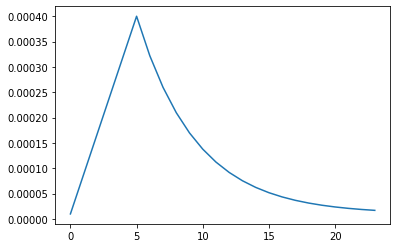

In [138]:
import matplotlib.pyplot as plt, cv2

EPOCHS = 24
IMAGE_SIZE= [256,256]; BATCH_SIZE = 32

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005 * strategy.num_replicas_in_sync
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
  if epoch < rampup_epochs:
    return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
  elif epoch < rampup_epochs + sustain_epochs:
    return max_lr
  else:
    return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True)

rang = np.arange(EPOCHS)
y = [lrfn(x) for x in rang]
plt.plot(rang, y)
print('Learning rate per epoch:')

In [139]:
#Build and compile model

from tensorflow.keras.layers import Input, Dense, Activation,Dropout, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, add, Flatten, BatchNormalization, Dropout
from tensorflow.keras import Sequential
import tensorflow.keras.layers.experimental.preprocessing as preprocessing

# first = Sequential()
# first.add(Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[*IMAGE_SIZE, 3]))
# first.add(Flatten())
# first.add(Dense(1, activation='sigmoid'))

first_input = Input(shape = (*IMAGE_SIZE, 3))
first_input_aug = preprocessing.RandomFlip('horizontal')(first_input)
conv_input_1 = Conv2D(kernel_size=3, filters=16, padding='valid', activation='relu')(first_input_aug)
conv_input_1aug = preprocessing.RandomFlip('horizontal')(conv_input_1)
conv_input_2 = Conv2D(kernel_size=3, filters=16, padding='same', activation='relu')(conv_input_1)
conv_input_3 = Conv2D(kernel_size=3, filters=16, padding='same', activation='relu')(conv_input_2)
conv_input_4 = Conv2D(kernel_size=3, filters=16, padding='same', activation='relu')(conv_input_3)

pool_input = GlobalAveragePooling2D()(conv_input_2)
first_dense = Dense(1, )(pool_input)
out_img = Dense(1,'sigmoid')(first_dense)
#===============================================================================

second_input = Input(shape=(19, ))
dense_layer_1 = Dense(25, activation='relu')(BatchNormalization()(second_input))#(BatchNormalization()(Dropout(0.3)(second_input)))#(second_input)#(Dropout(0.3)(second_input))#
dense_layer_2 = Dense(25, activation='relu')(BatchNormalization()(dense_layer_1))#(Dropout(0.3)(dense_layer_1))#(BatchNormalization()(Dropout(0.3)(dense_layer_1)))#(dense_layer_1)#
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)#(BatchNormalization()(dense_layer_2))#(Dropout(0.3)(dense_layer_2))#(BatchNormalization()(Dropout(0.3)(dense_layer_2)))#
dense_layer_4 = Dense(25, activation='relu')(BatchNormalization()(dense_layer_3))#(dense_layer_3)#
dense_layer_5 = Dense(25, activation='relu')(dense_layer_4)
dense_layer_6 = Dense(25, activation='relu')(dense_layer_5)



second_dense = Dense(1, )(dense_layer_2)
out_zero = Dense(1,'sigmoid')(second_dense)
#===============================================================================

merge_one = concatenate([first_dense, second_dense])
out_one = Dense(1,'sigmoid')(merge_one)


# third_input = Input(shape=(2, ))
# third_dense = Dense(1,)(third_input)

# merge_two = concatenate([merge_one, third_dense])
# out_two = Dense(1,'sigmoid')(merge_two)

input_set = [first_input, second_input]
output_set = [out_zero, out_one, out_img]




model = Model(inputs=input_set, outputs=output_set[1])



In [140]:
#looking at tfrecords

import tensorflow as tf, re, math

#IMAGE_SIZE= [256,256]; BATCH_SIZE = 32

AUTO = tf.data.experimental.AUTOTUNE

#tfr_path = '../input/siim-isic-melanoma-classification/tfrecords/'
#tfr_path = GCS_PATH + '/tfrecords/'
#tfr_path ='data/'
#tfr_path = 'tfrecords/'
tfr_path = 'gs://siim_isic/tfrecords_256_2/'


# INITIALIZE VARIABLES
TRAIN_FILENAMES = tf.io.gfile.glob(tfr_path + 'train*.tfrec')
TRAINING_FILENAMES, VALIDATION_FILENAMES = train_test_split(TRAIN_FILENAMES, train_size=0.8, test_size=0.2, random_state=None)
TEST_FILENAMES = tf.io.gfile.glob(tfr_path + 'test*.tfrec')
TRAIN_STEPS = count_data_items(TRAINING_FILENAMES) // BATCH_SIZE
#EPOCHS = 12

print('There are %i train images'%count_data_items(TRAINING_FILENAMES), ", STEPS PER EPOCH: ", TRAIN_STEPS)
print('There are %i valid images'%count_data_items(VALIDATION_FILENAMES))
print('There are %i test images'%count_data_items(TEST_FILENAMES))


There are 24842 train images , STEPS PER EPOCH:  776
There are 8284 valid images
There are 10982 test images


In [141]:
# DISPLAY TRAIN IMAGES
training_dataset = get_training_dataset()
training_dataset = training_dataset.unbatch().batch(32)
train_batch = iter(training_dataset)

# DISPLAY TRAIN IMAGES
validation_dataset = get_validation_dataset()
validation_dataset = validation_dataset.unbatch().batch(32)
valid_batch = iter(validation_dataset)

# DISPLAY TRAIN IMAGES

test_dataset = get_test_dataset()
test_dataset = test_dataset.unbatch().batch(32)
test_batch = iter(test_dataset)



In [142]:
tf.data.experimental.cardinality(
    training_dataset
)

<tf.Tensor: shape=(), dtype=int64, numpy=-1>

In [143]:
# t0 = time.time()
# lst = []
# training_dataset_t=training_dataset.take(1)
# for feature in training_dataset_t.take(100):
#     [lst.append(list((feat).numpy())) for feat in feature[1]]
#     #print((feature[1][0]).numpy())
#     #print(feature[2][0])
# X = pd.DataFrame(lst)
# X
# t1 = time.time()
# print(t1-t0)
# X

In [144]:
# counter = 0
# nan_count = 0
# for feat in training_dataset.take(1000):
#     counter += 1
#     check_feat=feat[0][1].numpy()
#     print(counter, nan_count)
#     nan_array=np.argwhere(np.isnan(feat[0][1].numpy()))
#     if len(nan_array) !=0:
#         nan_count += 1
#         print(check_feat)
#         #print(nan_array)

In [145]:
#help(Model)

In [146]:
model.compile(
        optimizer='adam',
        loss = 'binary_crossentropy',
        metrics = ['AUC']
    )

model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 19)]         0                                            
__________________________________________________________________________________________________
random_flip_12 (RandomFlip)     (None, 256, 256, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 19)           76          input_14[0][0]                   
______________________________________________________________________________________

In [147]:
t0 = time.time()
history = model.fit(
    training_dataset.map(lambda img, feat, target: [(img, feat), target]),
    validation_data=validation_dataset.map(lambda img, feat, target: [(img, feat), target]),
    #validation_split=0.3,
    epochs=EPOCHS,
    steps_per_epoch=TRAIN_STEPS,
    callbacks=[lr_callback]
)
t1 = time.time()
print(t1-t0)


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/24
  2/776 [..............................] - ETA: 2:13 - loss: 0.5863 - auc: 0.3185WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0042s vs `on_train_batch_end` time: 0.3354s). Check your callbacks.


776/776 [==============================] - 269s 347ms/step - loss: 0.5050 - auc: 0.4263 - val_loss: 0.4510 - val_auc: 0.4226

Epoch 00002: LearningRateScheduler reducing learning rate to 8.8e-05.
Epoch 2/24
776/776 [==============================] - 265s 341ms/step - loss: 0.1362 - auc: 0.5834 - val_loss: 0.0833 - val_auc: 0.6824

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000166.
Epoch 3/24
776/776 [==============================] - 266s 342ms/step - loss: 0.0855 - auc: 0.6973 - val_loss: 0.0805 - val_auc: 0.7534

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000244.
Epoch 4/24
776/776 [==============================] - 273s 351ms/step - loss: 0.0822 - auc: 0.7503 - val_loss: 0.0769 - val_auc: 0.7915

Epoch 00005: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 5/24
776/776 [==============================] - 264s 341ms/step - loss: 0.0793 - auc: 0.7799 - val_loss: 0.0755 - val_auc: 0.8215

Epoch 00006: LearningRateScheduler reducing

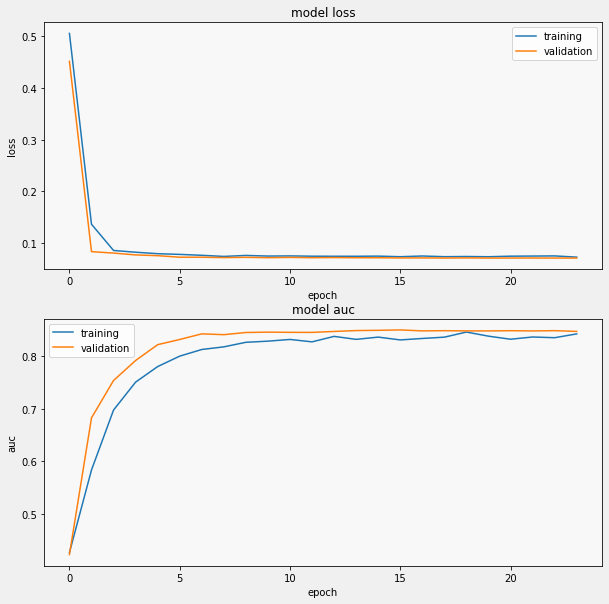

In [148]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1:
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        #plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['training', 'validation'])

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history.history['auc'],
    history.history['val_auc'],
    'auc',
    212,
)


In [149]:
model.input

[<tf.Tensor 'input_13:0' shape=(None, 256, 256, 3) dtype=float32>,
 <tf.Tensor 'input_14:0' shape=(None, 19) dtype=float32>]

In [150]:
print('Computing predictions...')

from sklearn.metrics import f1_score, roc_curve, auc

test_images_ds = validation_dataset.map(lambda img, feat, target:[img,feat,target])
test_images_ds 
# predictions=[]
# true_values=[]
# for feat in test_images_ds:
#     predictions.append(model.predict([feat[0],feat[1]]))
#     true_values.append(feat[2])

predictions = []
true_values = []
for feat in test_images_ds:
    for p in model.predict([feat[0],feat[1]]):
        predictions.append(p)
    for label in feat[2]:
        label = label.numpy()
        # label = label.decode("utf-8")
        # label = label.replace("'",'')
        true_values.append(label)
np.shape(true_values)
preds = predictions# np.reshape(predictions,(20*414))
true = true_values#np.reshape(true_values,(20*414))
fpr, tpr, thresholds = roc_curve(true, preds, pos_label=None)
print('AUC=%s'%auc(fpr, tpr))

Computing predictions...
AUC=0.8508712538090395


In [151]:
test_images_ds = test_dataset.map(lambda img, feat, label:[img, feat, label])
test_images_ds  

predictions = []
labels = []
for feat in test_images_ds:
    for p in model.predict([feat[0],feat[1]]):
        predictions.append(p)
    for label in feat[2]:
        label = label.numpy()
        label = label.decode("utf-8")
        label = label.replace("'",'')
        labels.append(label)


#np.shape(labels[0])

In [152]:
!gsutil cp gs://siim_isic/sample_submission.csv sample_submission.csv

Copying gs://siim_isic/sample_submission.csv...
/ [1 files][160.9 KiB/160.9 KiB]                                                
Operation completed over 1 objects/160.9 KiB.                                    


In [153]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0


In [154]:
df = pd.DataFrame()
df['image_name'] = labels
df['target'] = [i[0] for i in predictions]

merge_sub = sample_sub.drop(['target'], axis=1)
merge_sub = merge_sub.merge(df, on = ['image_name'])
merge_sub


,image_name,target
0,ISIC_0052060,0.000061
1,ISIC_0052349,0.001968
2,ISIC_0058510,0.000295
3,ISIC_0073313,0.000352
4,ISIC_0073502,0.005417
...,...,...
10977,ISIC_9992485,0.030769
10978,ISIC_9996992,0.017383
10979,ISIC_9997917,0.011554
10980,ISIC_9998234,0.003874


In [155]:
df.loc[df['image_name'] == 'ISIC_9992485']

,image_name,target
2990,ISIC_9992485,0.030769


In [156]:
merge_sub.to_csv("submission.csv", index=False)

In [157]:
!gsutil cp submission.csv gs://siim_isic/

Copying file://submission.csv [Content-Type=text/csv]...
/ [1 files][364.6 KiB/364.6 KiB]                                                
Operation completed over 1 objects/364.6 KiB.                                    
